In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_mid_bootcamp_project_FIFA_MoneyBall/fifa21_male2.csv')

In [3]:
pd.set_option('display.max_rows',300)
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


Cleaning

In [5]:
df.columns = [column.lower().replace(' ', '_') for column in df.columns]

In [6]:
df = df.set_index('id')

In [7]:
df

,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17125 entries, 2 to 259105
Data columns (total 106 columns):
 #    Column            Dtype  
---   ------            -----  
 0    name              object 
 1    age               int64  
 2    ova               int64  
 3    nationality       object 
 4    club              object 
 5    bov               int64  
 6    bp                object 
 7    position          object 
 8    player_photo      object 
 9    club_logo         object 
 10   flag_photo        object 
 11   pot               int64  
 12   team_&_contract   object 
 13   height            object 
 14   weight            object 
 15   foot              object 
 16   growth            int64  
 17   joined            object 
 18   loan_date_end     object 
 19   value             object 
 20   wage              object 
 21   release_clause    object 
 22   contract          object 
 23   attacking         int64  
 24   crossing          int64  
 25   finishing         i

In [9]:
df.isna().sum()

name                    0
age                     0
ova                     0
nationality             0
club                   23
bov                     0
bp                      0
position              413
player_photo            0
club_logo              23
flag_photo              0
pot                     0
team_&_contract         0
height                  0
weight                  0
foot                    0
growth                  0
joined                 58
loan_date_end       16215
value                   0
wage                    0
release_clause          0
contract                0
attacking               0
crossing                0
finishing               0
heading_accuracy        0
short_passing           0
volleys                58
skill                   0
dribbling               0
curve                  58
fk_accuracy             0
long_passing            0
ball_control            0
movement                0
acceleration            0
sprint_speed            0
agility     

In [10]:
df = df.drop('loan_date_end', axis=1)

In [11]:
df = df.dropna()

In [12]:
df=df.select_dtypes(np.number)

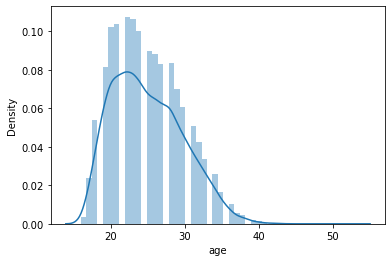

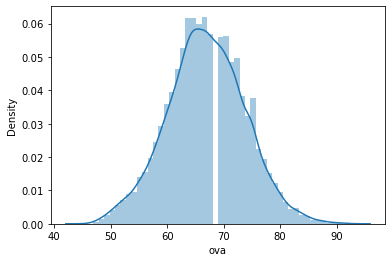

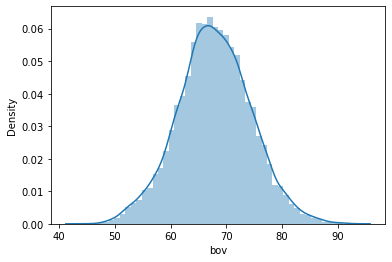

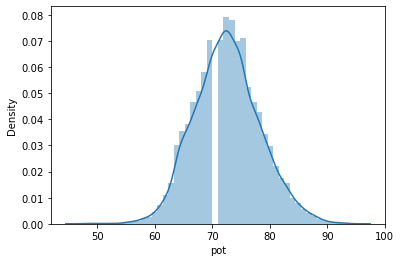

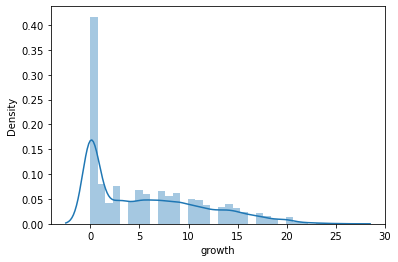

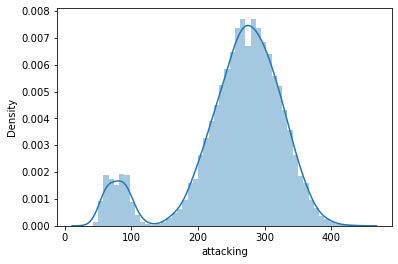

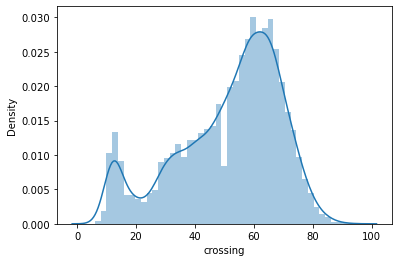

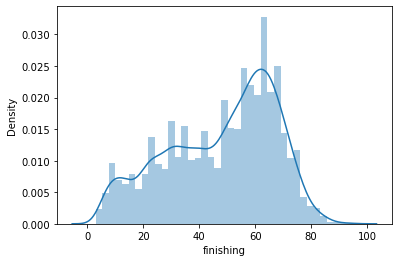

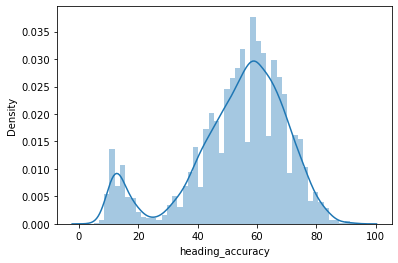

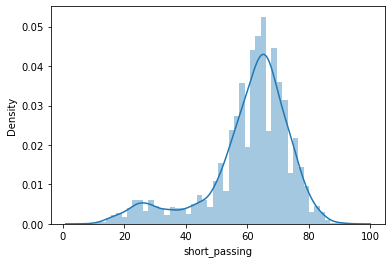

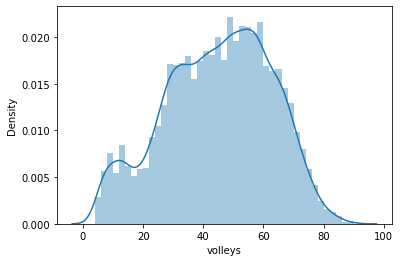

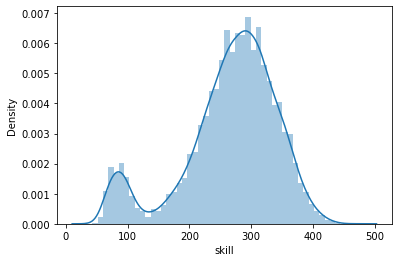

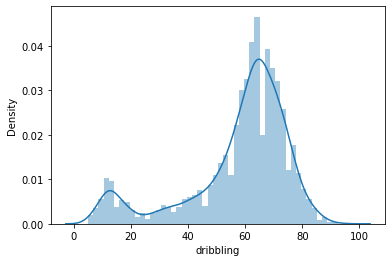

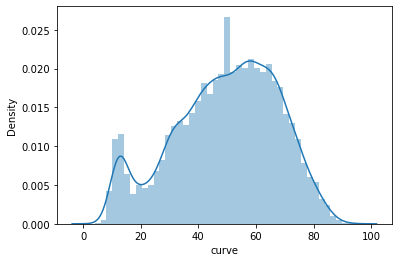

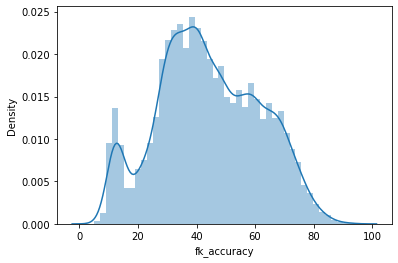

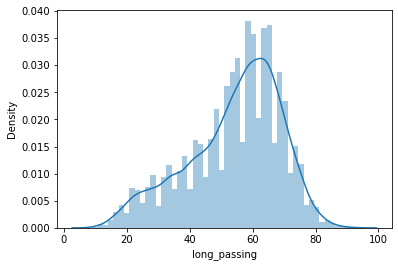

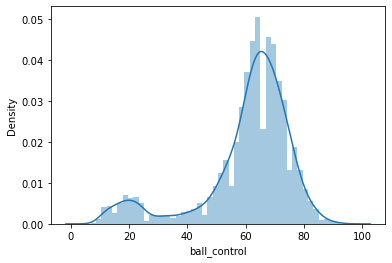

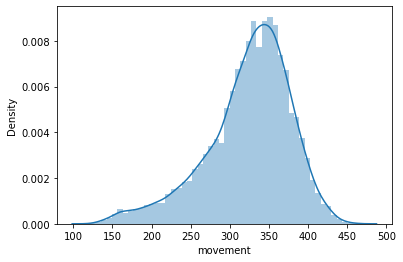

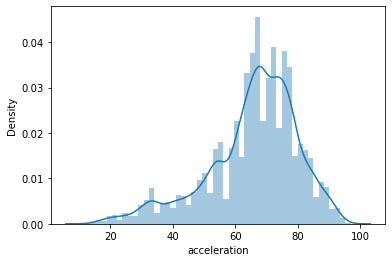

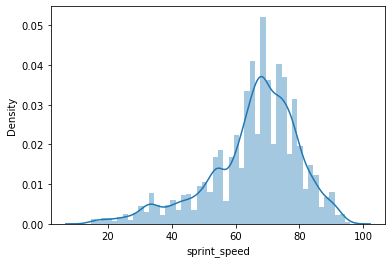

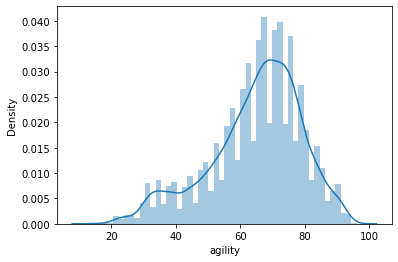

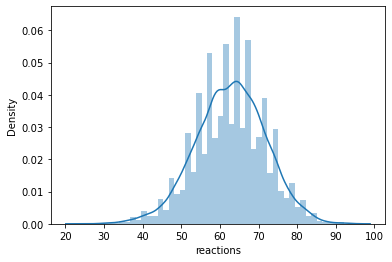

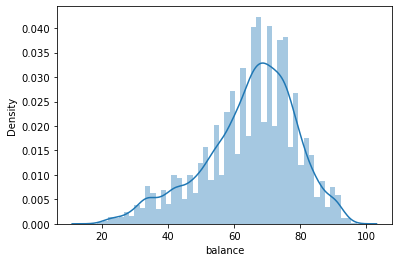

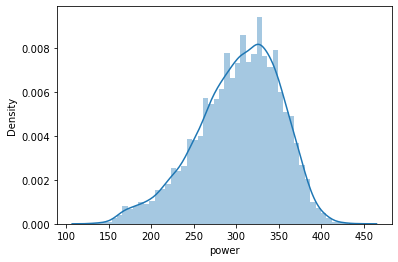

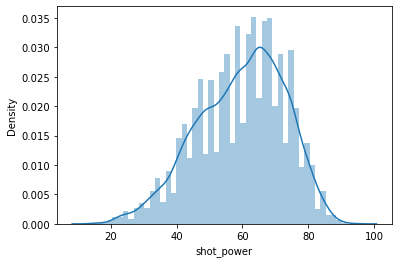

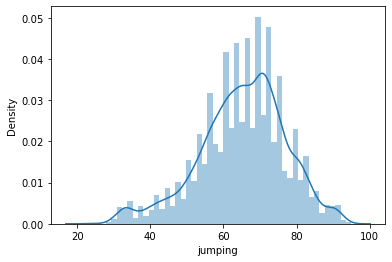

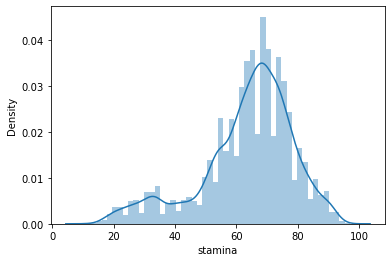

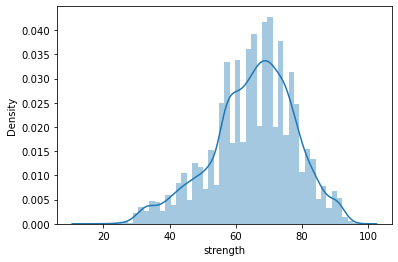

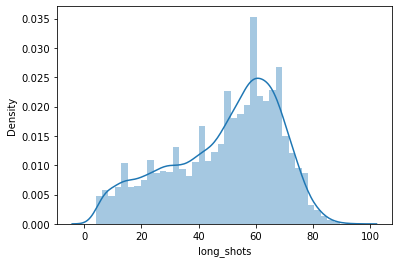

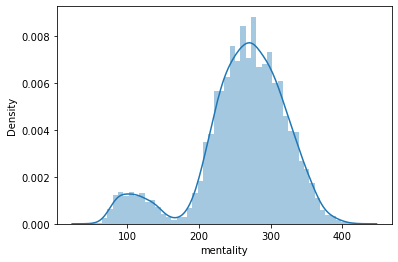

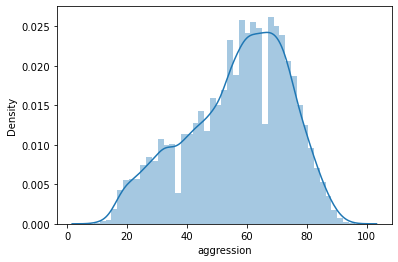

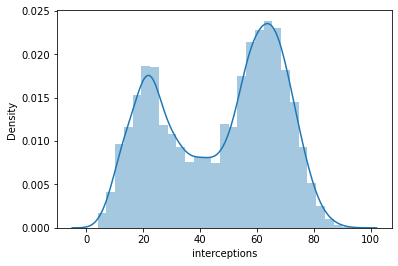

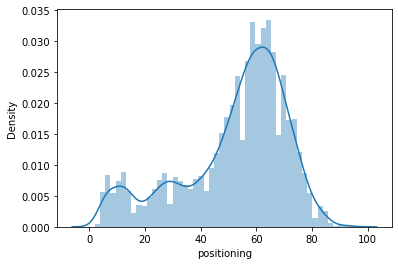

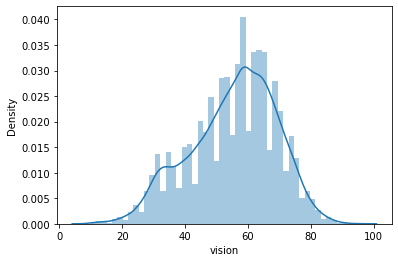

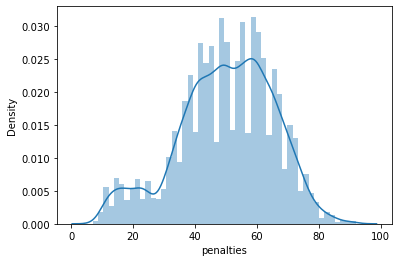

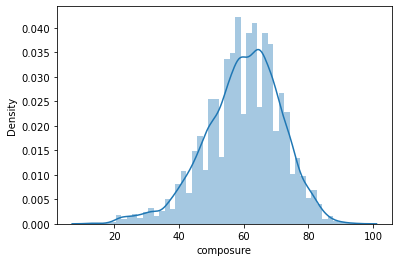

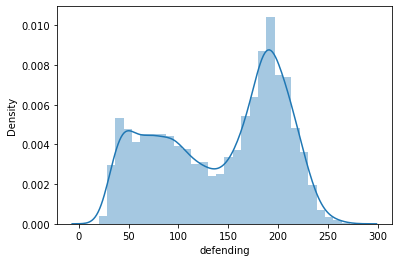

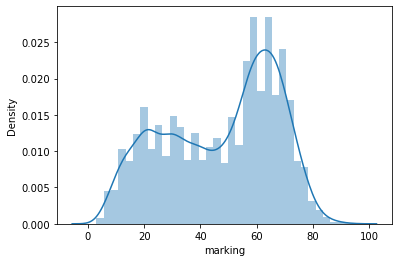

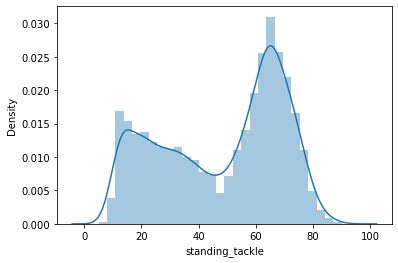

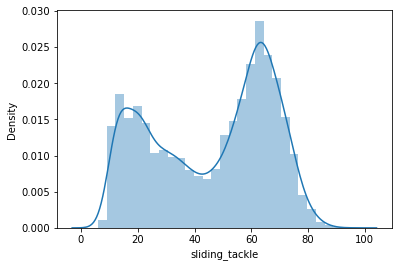

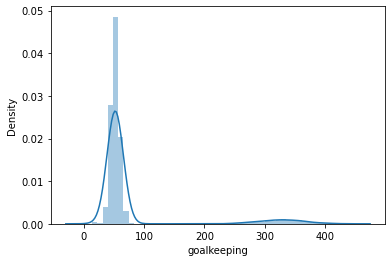

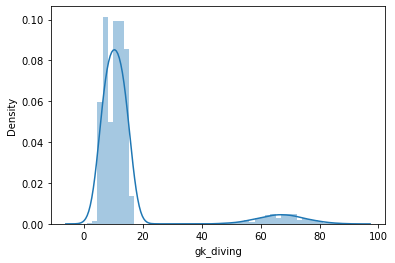

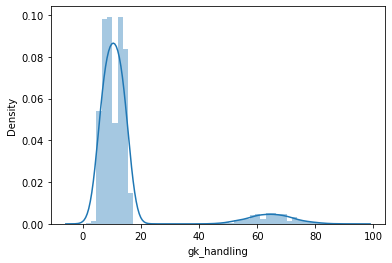

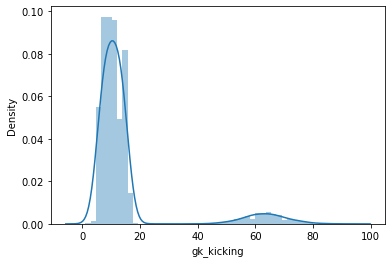

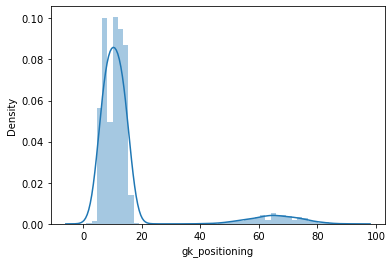

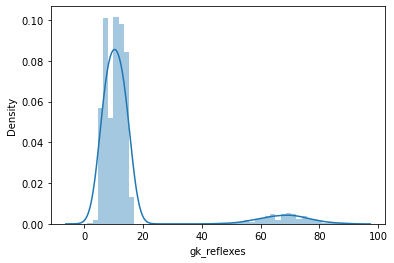

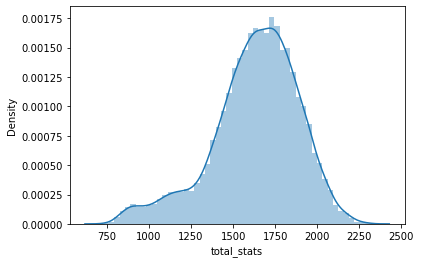

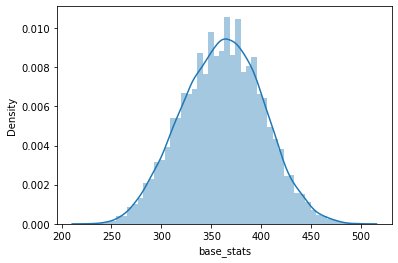

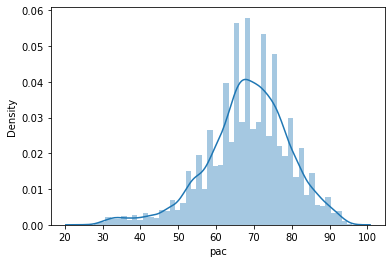

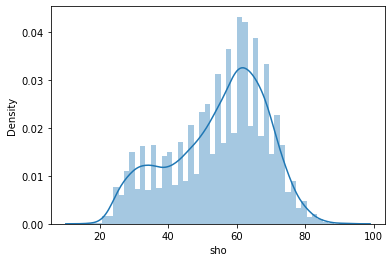

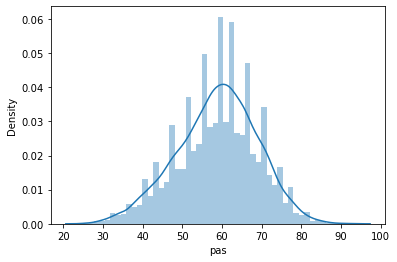

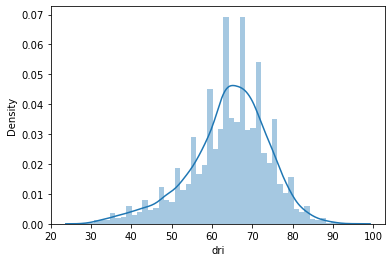

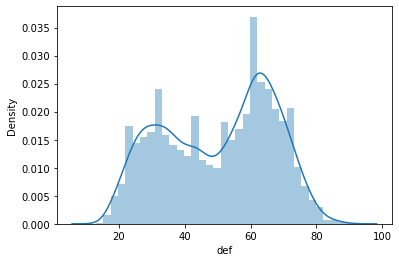

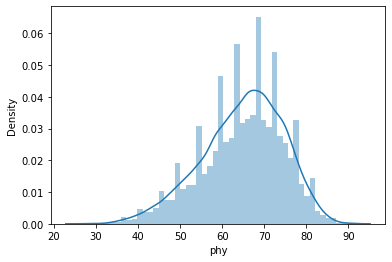

In [13]:
for column in df.select_dtypes(np.number).columns:
    sns.distplot(df[column])
    plt.show()

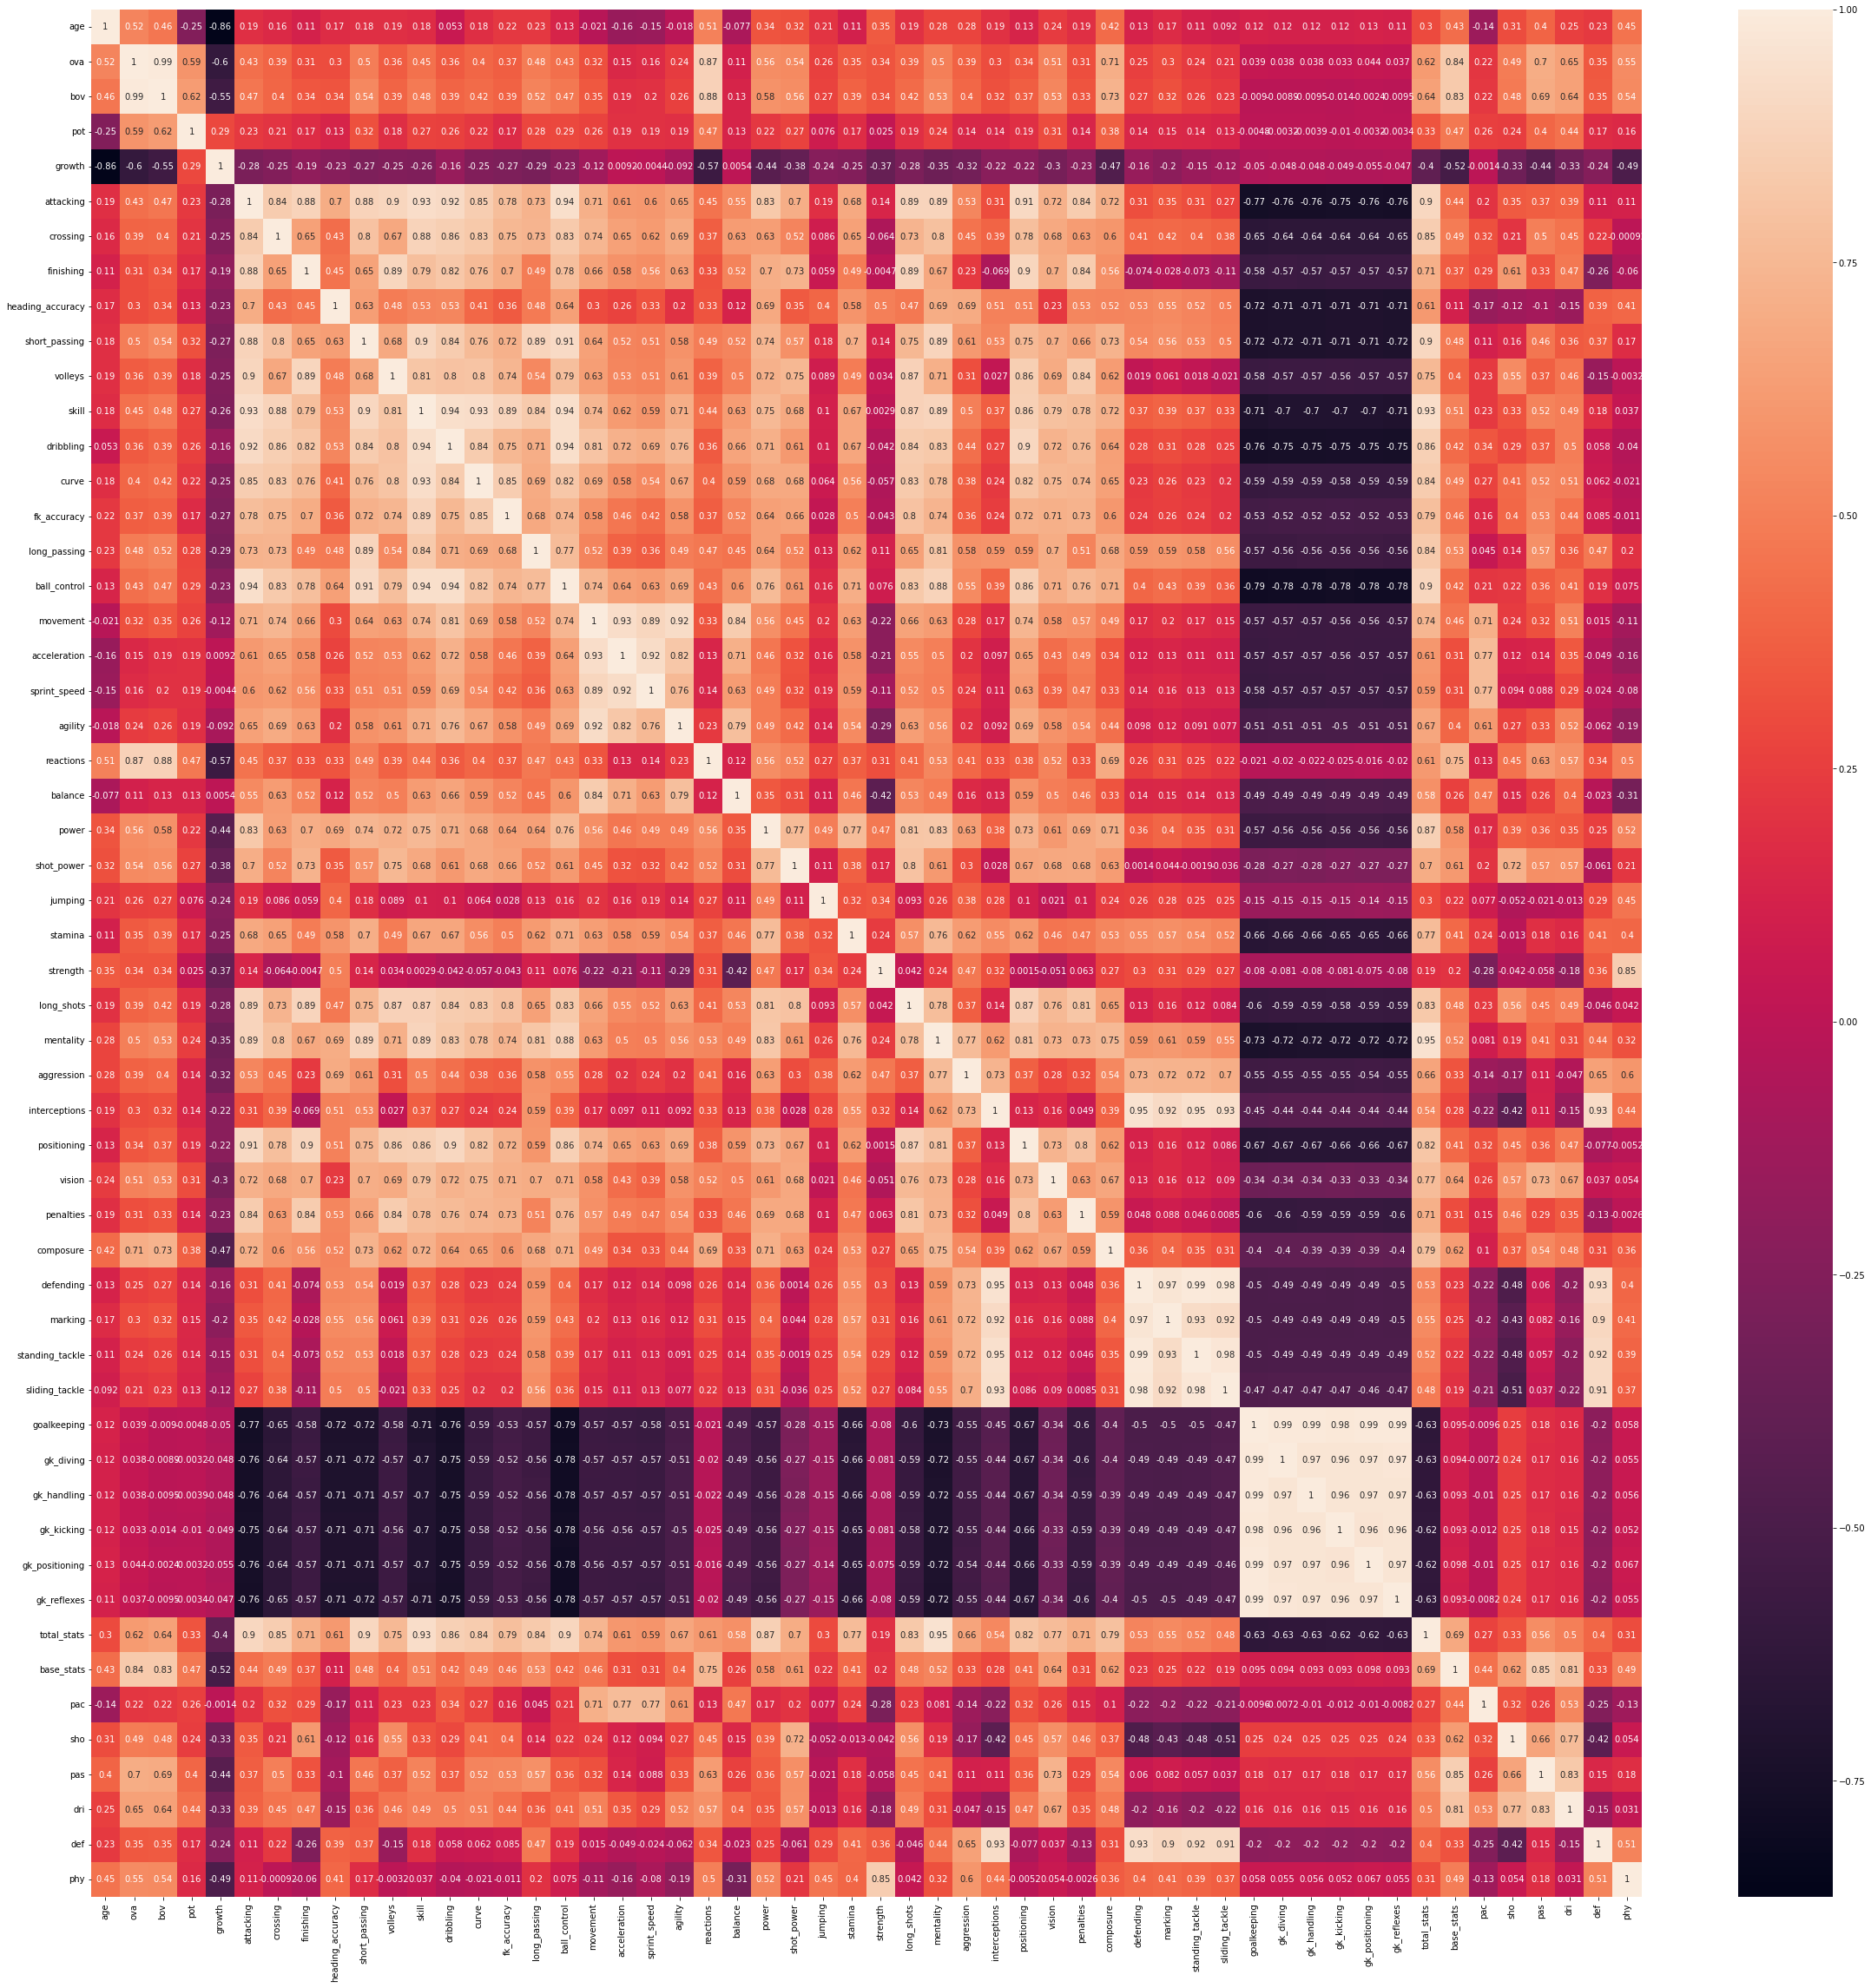

In [14]:
mask = np.zeros_like(df.corr())
fig, ax = plt.subplots(figsize=(40, 40))
ax = sns.heatmap(df.corr(), mask=mask, annot=True)
plt.show()

In [15]:
df

,age,ova,bov,pot,growth,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16,37,71,70,71,0,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,53,69,73,69,58,63
41,36,81,82,81,0,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,58,70,85,85,63,59
80,38,77,77,77,0,342,80,66,43,84,69.0,406,77,83.0,80,85,81,308,54,36,67.0,70,81.0,340,77,72.0,51,64,76,384,87,62.0,65.0,85.0,85,80.0,190,65,65,60.0,47,7,11,7,14,8,2017,403,44,71,83,77,62,66
330,35,80,81,80,0,380,68,84,63,81,84.0,374,82,82.0,63,63,84,380,69,68,77.0,83,83.0,363,81,62.0,72,68,80,343,67,34.0,85.0,82.0,75,86.0,71,28,26,17.0,63,11,9,13,14,16,1974,407,68,82,75,82,31,69
1179,42,82,82,82,0,95,13,15,13,37,17.0,122,26,20.0,13,35,28,251,37,30,55.0,80,49.0,243,56,71.0,34,69,13,150,38,28.0,12.0,50.0,22,70.0,35,13,11,11.0,396,77,76,74,91,78,1292,429,77,76,74,78,33,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,22,64,66,69,5,197,35,23,66,47,26.0,193,44,26.0,33,34,56,243,52,55,46.0,48,42.0,279,48,70.0,59,74,28,218,69,58.0,23.0,29.0,39,46.0,198,61,71,66.0,39,11,8,8,5,7,1367,302,54,30,37,48,64,69
259090,18,56,58,66,10,248,50,43,50,64,41.0,264,57,42.0,50,61,54,298,61,63,52.0,54,68.0,271,51,62.0,53,57,48,259,51,50.0,55.0,53.0,50,46.0,132,34,42,56.0,57,12,15,7,12,11,1529,319,62,46,57,56,43,55
259091,18,56,56,67,11,218,55,34,53,42,34.0,212,52,43.0,34,36,47,308,66,61,54.0,59,68.0,233,28,61.0,53,54,37,256,58,55.0,49.0,45.0,49,43.0,163,55,54,54.0,40,8,7,5,12,8,1430,303,63,35,44,52,54,55


In [16]:
def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

In [17]:
df, _ci = boxcox_transform(df)
df

,age,ova,bov,pot,growth,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16,2.372979,51.506113,49.740147,13.246518,4.558940,67918.231812,449.872614,126.079045,682.303702,17853.100843,85.956107,25677.892458,3199.110397,158.942449,43.455533,840.026640,15140.282917,5.921044e+05,2560.192836,2199.558054,1673.660430,181.993051,1814.446211,66758.503344,527.821432,598.618322,2689.535136,632.285281,210.125031,85702.267919,347.224109,63.553554,555.066928,406.252240,230.034754,1022.559537,165.632522,91.087300,49.937742,34.410183,0.960666,1.063217,1.135156,1.167433,1.116527,1.096373,1.511443e+07,490.506566,1240.818543,573.342244,318.607216,3950.151435,65.895418,2268.265666
41,2.361888,58.182409,57.522112,14.208821,4.558940,80780.155315,523.882128,138.177680,553.187211,27104.115134,101.157162,30826.941497,4935.667236,161.379796,39.210397,1096.461571,27197.214442,8.098056e+05,3074.062963,2811.251024,2692.635693,219.764186,1961.249038,55873.984697,442.834569,354.612088,2192.690559,668.693344,206.211429,89629.494048,258.175302,62.670272,630.266122,583.614264,213.861326,1253.677146,196.823491,88.243235,67.659961,47.843584,0.956694,0.974810,1.147472,1.005008,1.142789,1.010541,1.715621e+07,537.477950,1481.311146,586.821582,396.047457,6166.028235,71.935636,1984.531109
80,2.383701,55.521687,54.294509,13.832067,4.558940,69983.228137,579.155222,130.895466,373.731032,22858.396626,87.330799,30552.616238,4018.731284,168.728858,43.921846,1141.913725,20965.011241,6.066681e+05,2368.593969,1079.947050,1948.805769,200.667463,2271.078024,73676.180046,549.887788,988.606532,1679.112973,705.939999,229.955453,96719.143755,467.584289,55.590283,471.874157,510.142124,271.687273,1044.789412,206.871624,83.990225,77.910623,51.172612,0.957556,1.011688,1.120912,1.045001,1.153432,1.039062,1.721502e+07,514.638256,860.722789,600.419538,382.795193,4992.785309,70.725766,2493.736885
330,2.350405,57.518401,56.878205,14.115593,4.558940,86705.833065,449.872614,175.551557,721.253587,20895.088590,108.121066,26314.312972,4580.362140,166.273060,35.842680,685.026051,22935.587549,1.021968e+06,4001.083785,4280.131736,2560.501527,251.149273,2379.139837,84231.824479,594.977087,761.705684,3434.013007,782.918203,246.125239,76735.871116,318.946543,30.568634,722.373569,483.442932,230.034754,1182.298449,75.095331,33.180868,28.902538,14.616640,0.962465,1.097805,1.084337,1.167433,1.153432,1.148110,1.638294e+07,520.008122,2024.820583,757.648719,331.161607,5710.641527,33.758434,2730.089072
1179,2.423303,58.845651,57.522112,14.301428,4.558940,5171.813894,33.889526,21.088310,47.276274,3018.088377,18.638731,3429.025124,420.111568,29.749266,8.856602,251.094881,1520.007119,3.650172e+05,1055.026481,727.621517,1322.991835,239.263641,871.279031,37063.158941,334.944015,964.790188,723.838865,802.675060,21.646635,14083.568635,138.821302,25.140165,31.801760,230.516704,44.653767,831.516882,35.966923,13.932132,11.045483,9.289674,0.974358,1.259130,1.294523,1.322759,1.294339,1.257381,6.182806e+06,549.588044,2584.938623,670.166305,324.866309,5132.260472,36.104668,4797.400595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,2.148943,46.780831,47.117395,13.045422,2.838187,22793.538890,160.030998,35.940270,781.363255,5448.901235,29.971492,7898.572339,1255.165997,41.104617,20.514246,238.958557,8424.160182,3.368145e+05,2184.906816,2703.690318,931.611331,121.983

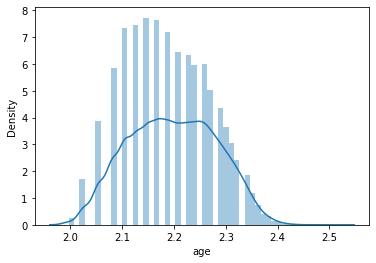

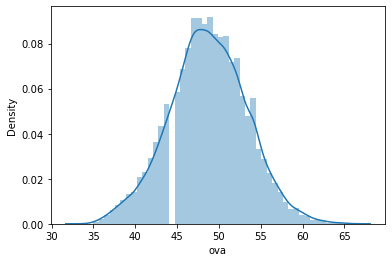

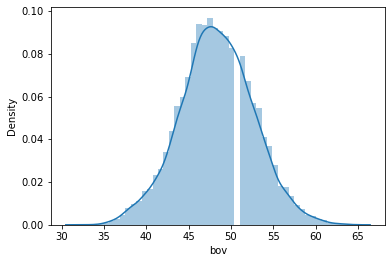

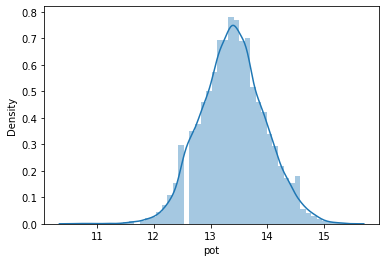

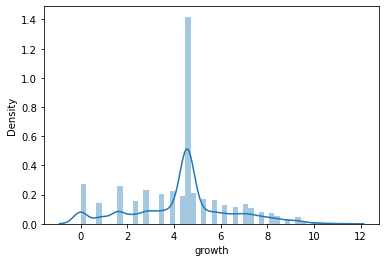

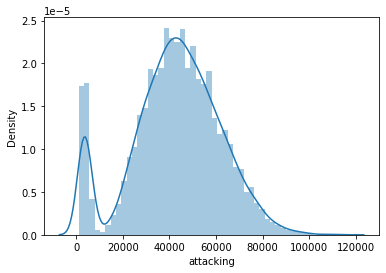

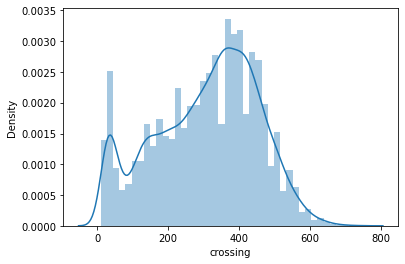

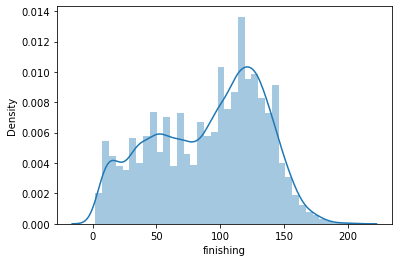

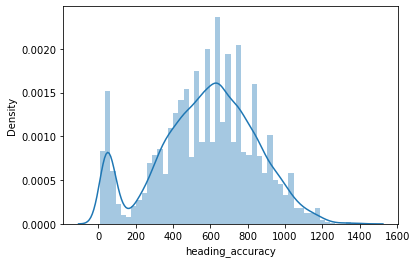

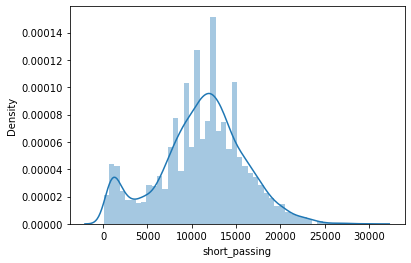

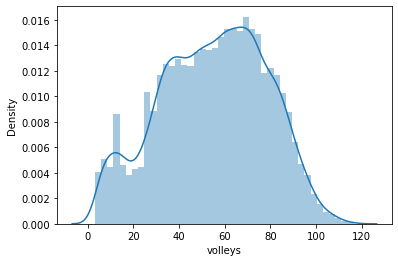

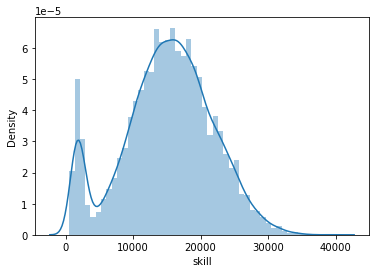

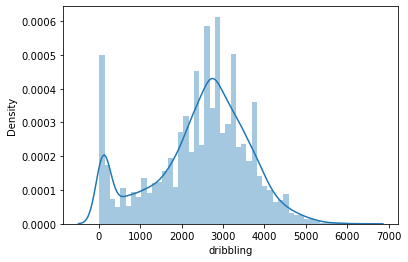

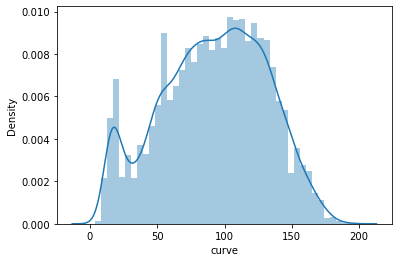

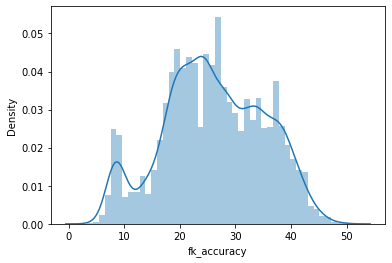

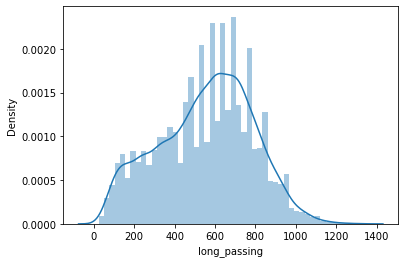

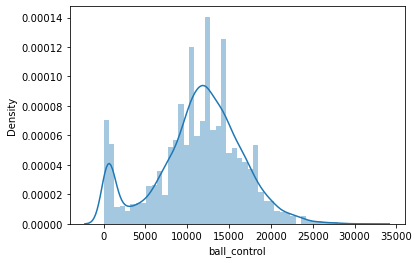

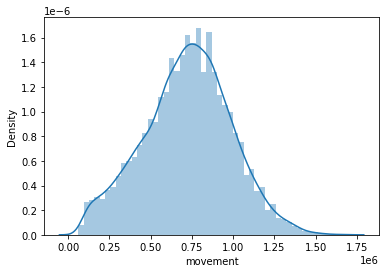

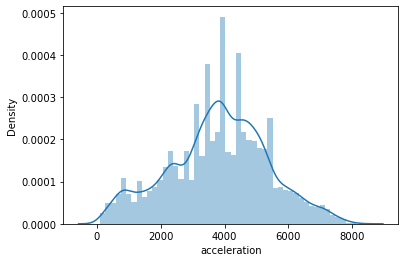

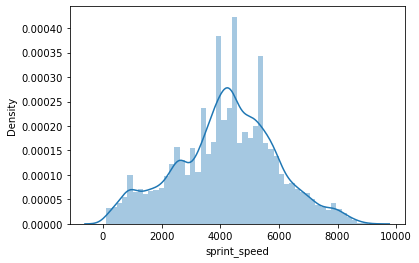

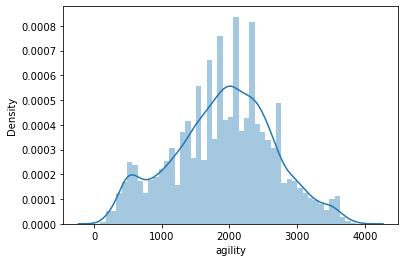

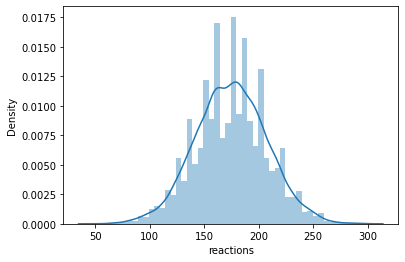

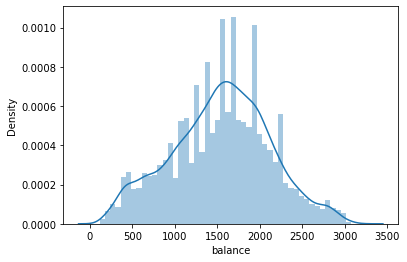

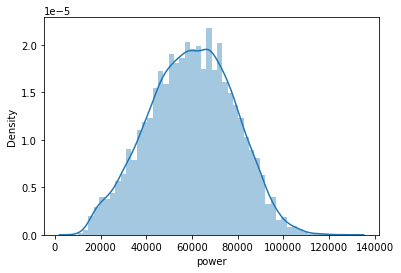

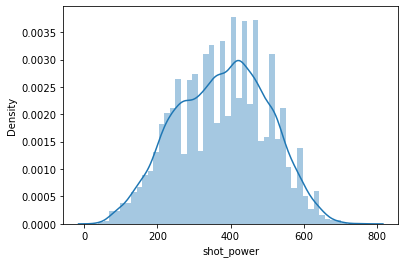

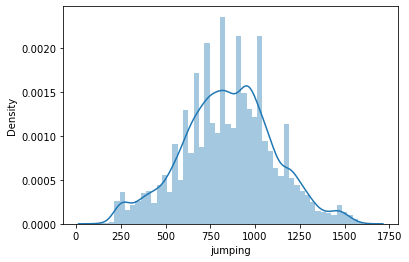

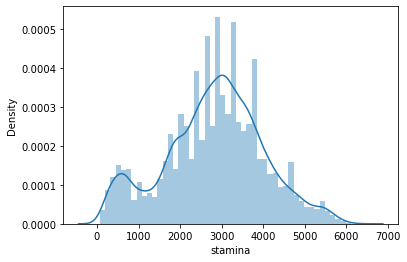

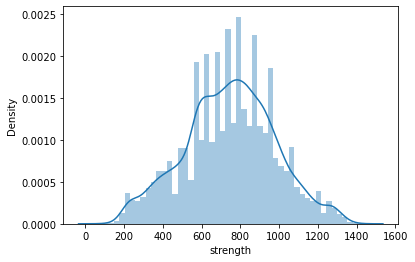

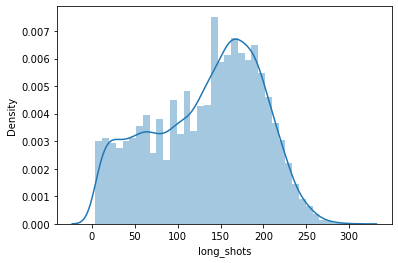

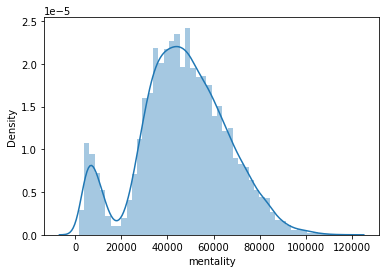

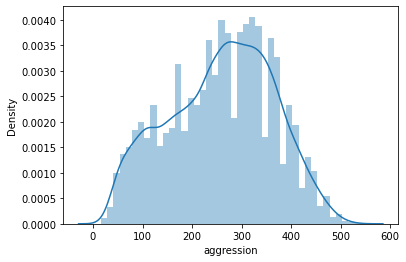

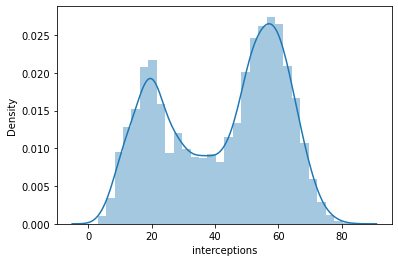

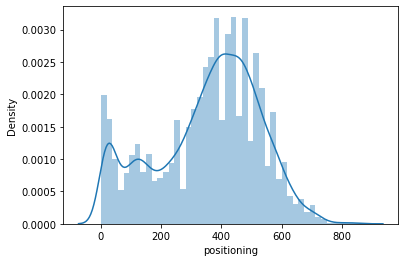

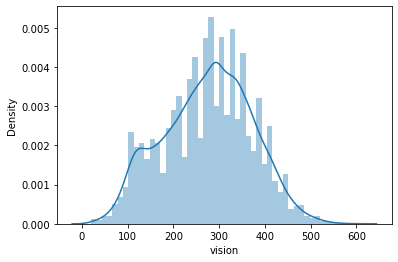

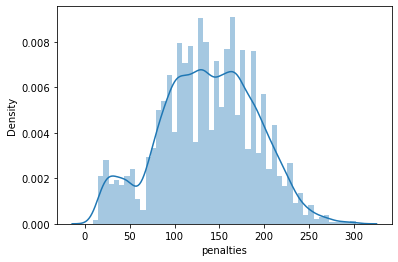

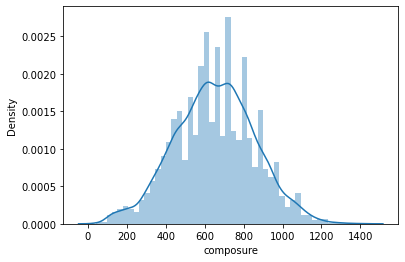

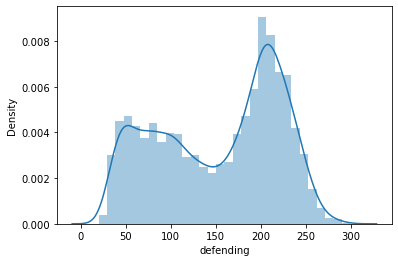

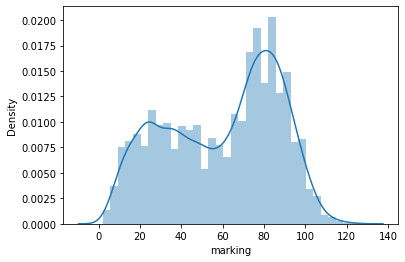

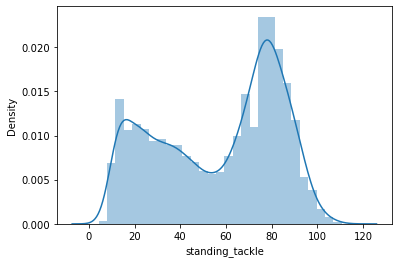

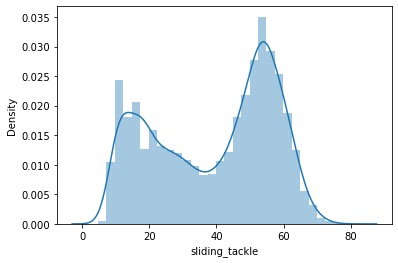

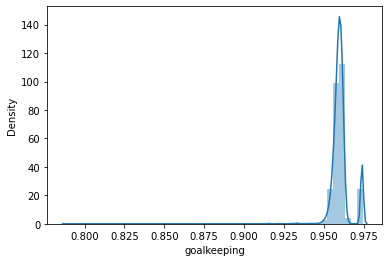

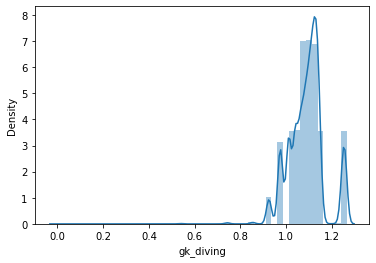

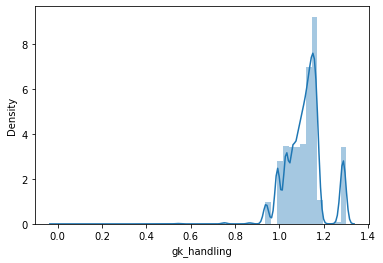

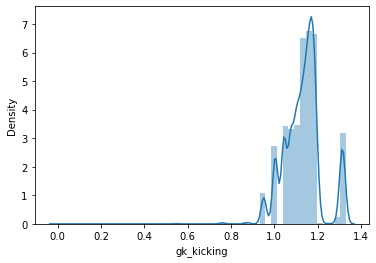

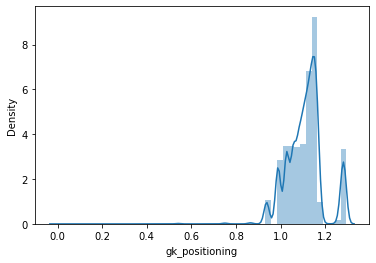

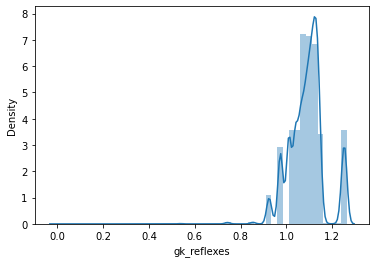

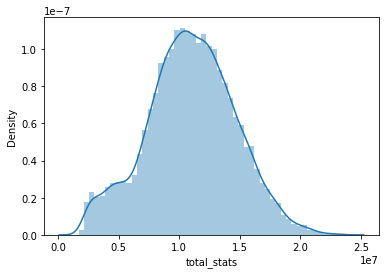

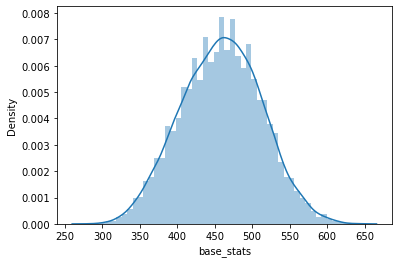

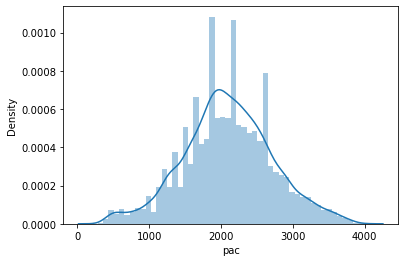

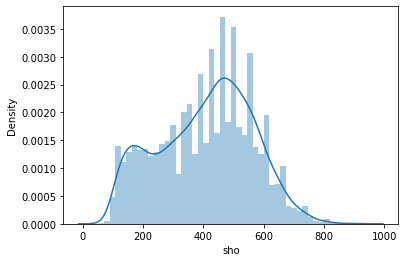

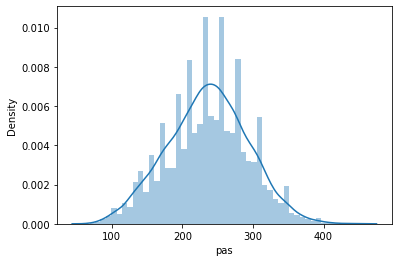

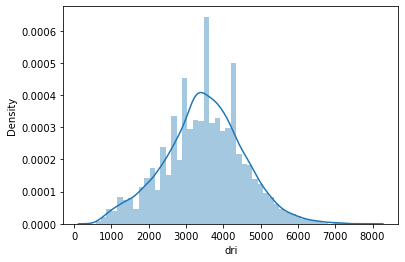

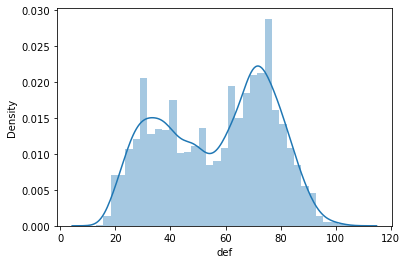

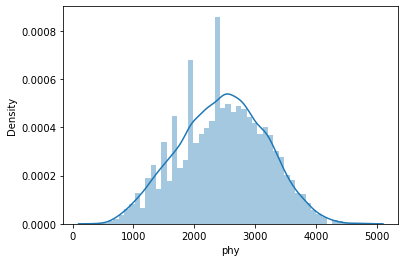

In [18]:
for column in df.select_dtypes(np.number).columns:
    sns.distplot(df[column])
    plt.show()

In [19]:
X = df.drop('ova', axis=1)
y = df['ova']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# start the model
model = LinearRegression()
# train the model
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# get predictions
predictions = model.predict(X_test)

In [22]:
# get metrics
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9841759116480634, 0.44170360810249937, 0.5829439288469271)

In [23]:
mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.44170360810249937, 0.5829439288469271)

In [24]:
# MAE and MSE are log transformed
# have to inverse transform
from scipy.special import inv_boxcox

predictions = inv_boxcox(predictions, _ci['ova'])

In [25]:
import math

results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['ova'])
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,resid
id,,,
244049,57.0,56.906785,0.093215
193910,70.0,68.869860,1.130140
257409,53.0,52.640141,0.359859
219551,62.0,62.988984,0.988984
212750,63.0,62.030598,0.969402
...,...,...,...
245532,65.0,64.891723,0.108277
219985,80.0,79.463739,0.536261
193314,83.0,83.099230,0.099230


In [26]:
results.describe()

,true,pred,resid
count,4925.000000,4925.000000,4925.000000
mean,66.917360,66.916069,0.653188
std,6.857896,6.808747,0.561388
min,45.000000,43.140724,0.000649
25%,62.000000,62.444367,0.253857
50%,67.000000,66.828598,0.529429
75%,72.000000,71.514958,0.889422
max,91.000000,91.313370,5.970848


<AxesSubplot:xlabel='true', ylabel='pred'>

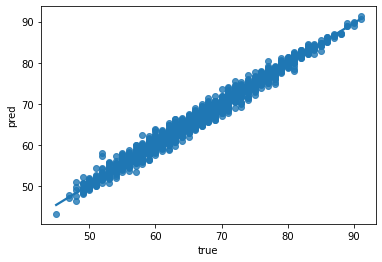

In [27]:
sns.regplot(results['true'], results['pred'])